# Build a simple  Neural Network in Keras

Build a shallow neural network to classify MNIST digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]( https://colab.research.google.com/github/suniltt/fdp2021/blob/main/simple_ann/simple_net_in_keras.ipynb)

In [ ]:
# you may install keras and tensor flow if they are missing 

In [ ]:
#pip install keras 

In [ ]:
#pip install tensorflow

What is a tensor ?
   
Tensors are multi-dimensional arrays with a uniform type

Graph computation 
 

  
<img src="images/tf1.png"/>

  
<img src="images/tf2.png"/>
 

Tensor flow is an open source library which  provides graph computation capabilities. 


Keras is a high level library that uses Tensor flow to build machine learning applicaiton. 

In this  lecture series we will use keras to explore machine learning algorithms from a pratcical point of view

####  MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database ) is a large database of handwritten digits that is commonly used for training image processing and machine learning algorithms.
Ref:http://yann.lecun.com/exdb/mnist/

Some sample digits from MNIST
  
  <img src="images/mnist.png"/>



We will try to build a simple ANN using keras to classify MNIST data set. The data set has 60000 training images and 10000 testing images. Each image is 28x28 gray scale images. Each pixel value can be between 0 and 255 ( 8bit)


<img src="images/fig_3_mnist.png"/>

We are going to build a simple ANN with one hidden layer using keras. The block diagram is shown below.
There are 784 (= 28x28) inputs for each digit. The network should  find out which digit it is. There are 10 out puts ( 0 to 9 ). The out put layer is designed to out put  a boolean ( 0 or 1 )depending on the input degit.
Eg Fo digit 7 00000 00100 will be out put. ( This kind of encoding is called one hot encoding) 

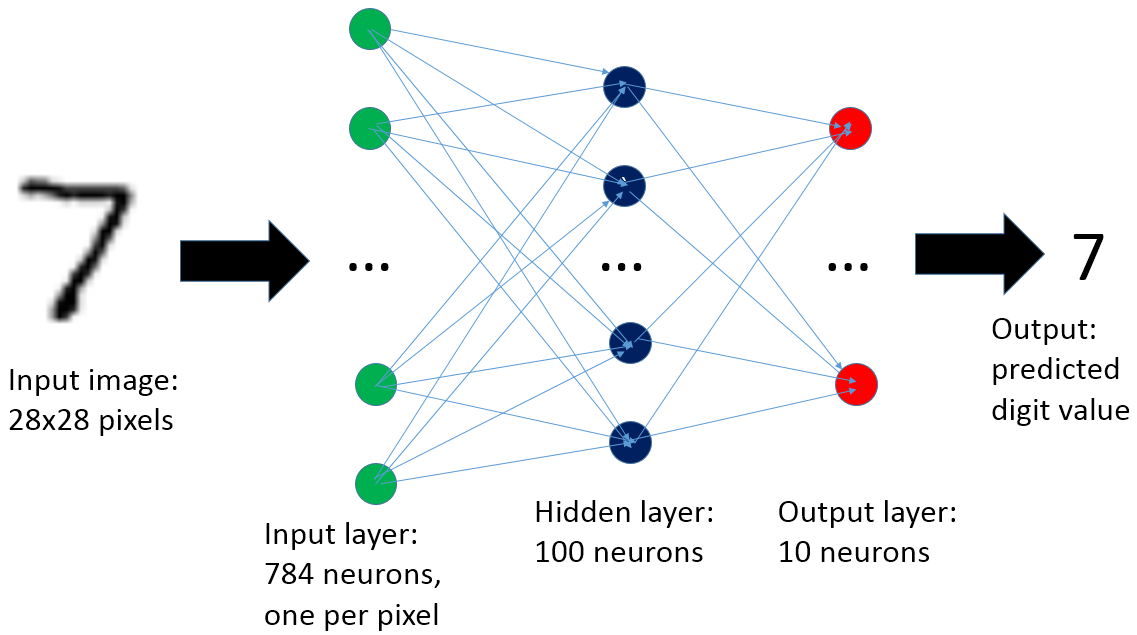
<img src="images/ann.png"/>

#### Load dependencies

In [1]:
import keras                                

from keras.datasets import mnist    # Mnist data set from keras


from keras.models import Sequential   #  Sequential model


from keras.layers import Dense        # Dense network

from tensorflow.keras.optimizers import SGD    #optimizer


from matplotlib import pyplot as plt    # This is for plotting  

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
# data will be downloaded from internet

# X_train contains training data,y_train lablels
# X_valid  contains test data 

In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

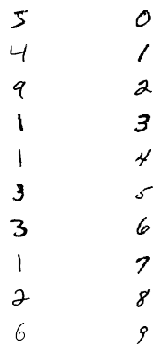

In [7]:
plt.figure(figsize=(5,5))
for k in range(20):      # chose a range of training values 
    plt.subplot(10, 2, k+1)   # This should match with value above ( 10X2 =20)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()  # try commenting this
plt.show()

In [8]:
X_valid.shape

(10000, 28, 28)

In [9]:
y_valid.shape

(10000,)

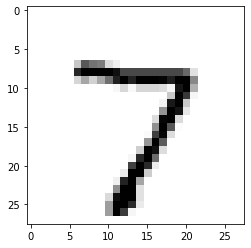

In [10]:
plt.imshow(X_valid[0], cmap='Greys')

In [11]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_valid[0]

7

#### Preprocess data

In [13]:
# We do two things here. Reshape the 28x28  digit to a single vector of 784 number.
# The array elements are  between 0 and 255 . We need to normalize this to a value between 0 and 1 for that we 
# convert each number to float and then divide by 255.

X_train = X_train.reshape(60000, 784).astype('float32')   
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [14]:
X_train /= 255
X_valid /= 255

In [15]:
X_valid[0]  # This is  7 the first element in X_valid represented as a single dim array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# We convert the lables to one hot representation. 

from keras import utils as np_utils

n_classes = 10

y_train =keras.utils.np_utils.to_categorical (y_train, n_classes)
y_valid= keras.utils.np_utils.to_categorical(y_valid, n_classes)
 

In [17]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

 
 <img src="images/keras_model.png"/>

#### Define neural network architecture

There are two ways to build Keras models: sequential and functional.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible. Look at the following link for more information. 

https://machinelearningmastery.com/keras-functional-api-deep-learning/

In [18]:
model = Sequential() 


The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer. The dense layer is found to be the most commonly used layer in the models.
 
 <img src="images/dense_layer.png"/>


In [19]:
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

Let us examine above line 

There are  64 neurons in the hidden layer

Each neuron has sigmoid activation funtion 
There are 784 inputs.

 One neuron
 
 <img src="images/n1.png"/>


Sigmoid activation function

 

 <img src="images/sigmoid.png"/>

In [20]:
# final layer 

model.add(Dense(10, activation='softmax'))


#Softmax layer converst outputs to probablites 


 <img src="images/softmax.jpg"/>

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
(64*784) # Wi Xi  Total weights at input layer 

50176

In [23]:
(64*784)+64   # 64 biases 

50240

In [24]:
(10*64)+10  # final layer  Wights + bias

650

In [25]:
(10*64)+10  +  (64*784)+64    

50890

#### Compile  the network

In [26]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Loss function  

Loss funtion is a method of evaluating how well your algorithm models your dataset. If your predictions are totally off, your loss function will output a higher number. If they’re pretty good, it’ll output a lower number. As you change pieces of your algorithm to try and improve your model, your loss function will tell you if you’re getting anywhere.



 <img src="images/loss_function.png"/>

Mean Square Error/Quadratic Loss/L2 Loss
 
 <img src="images/mse.png"/>

Please read about other loss functions   https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

#### Optimizer and   learning rate  

Effect of changing weights on Loss funtion
 
 <img src="images/opt1.png"/>

Loss vs Weight

 <img src="images/opt2.png"/>
 

Gradient Descent

 

 <img src="images/opt3.png"/>

 

 <img src="images/opt4.png"/>

 

 <img src="images/opt5.png"/>

Adjusting the weights
 

 <img src="images/opt6.png"/>
Here the alpha symbol is the learning rate. This will affect the speed of optimization of our neural network. 

If the learning rate is too small our net work may take a long time. IF it is too large  you may not find a good minimum. 

#### Train!

In [27]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 5s 7ms/step - loss: 0.0963 - accuracy: 0.1000
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0923 - accuracy: 0.1056
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0909 - accuracy: 0.1144
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0901 - accuracy: 0.1545
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - accuracy: 0.2186
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0891 - accuracy: 0.2735
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0887 - accuracy: 0.3046
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0883 - accuracy: 0.3208
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0879 - accuracy: 0.3295
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0875 - accuracy: 0.334

Let us choose  one row vector from X valid and test the model


In [28]:
test_case =X_valid[:1,:]

In [29]:
test_case.shape

(1, 784)

In [30]:
predicted_digit=model.predict(test_case)

In [31]:
predicted_digit  # This is an array with probabilities for each digit

array([[0.11404396, 0.12806372, 0.0839285 , 0.09964052, 0.10251606,
        0.04824218, 0.09725367, 0.15250406, 0.08554919, 0.08825807]],
      dtype=float32)

We can use a mumpy funtion to convert it to the desired label

In [32]:
import numpy as np
np.argmax(predicted_digit,axis=1)

array([7])

In [33]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.3674


[0.08349421620368958, 0.36739999055862427]